# Development of regression model to predict car prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import pickle
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size ch

In [29]:
df_cars_raw = pd.read_csv('cars.csv',sep=';',index_col=0)

In [37]:
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">href</a>'.format(val)

def df_with_href(df):
    return df.style.format({'href': make_clickable})

In [ ]:
pd.options.style = '${:,.2f}'.format

In [31]:
df_cars_raw.describe()

,Miltal,Modellår,Tillverkningsår,price
count,676.000000,676.000000,676.000000,676.000000
mean,9059.727071,2012.412722,2012.159763,94415.054734
std,8286.322026,4.973389,4.929540,62208.751867
min,0.000000,1997.000000,1997.000000,2500.000000
25%,687.500000,2009.750000,2009.000000,44800.000000
50%,7851.000000,2013.000000,2013.000000,86812.500000
75%,14705.750000,2017.000000,2016.000000,149225.000000
max,77123.000000,2018.000000,2018.000000,419000.000000


In [4]:
index = ((df_cars_raw['Miltal'] < 50000) & 
         (df_cars_raw['Miltal'] > 1000) & 
         (df_cars_raw['price'] > 2000))
df_cars = df_cars_raw.loc[index].copy()

In [5]:
df_cars.describe()

,Miltal,Modellår,Tillverkningsår,price
count,502.000000,502.000000,502.000000,502.000000
mean,12032.928287,2010.583665,2010.314741,68059.081673
std,6804.256825,4.485057,4.385212,45060.359187
min,1100.000000,1997.000000,1997.000000,2500.000000
25%,6603.250000,2008.000000,2008.000000,30375.000000
50%,11238.250000,2012.000000,2011.500000,64000.000000
75%,16694.500000,2014.000000,2014.000000,99000.000000
max,32499.500000,2018.000000,2017.000000,279000.000000


/Users/martinalexandersson/Dev/blocket/venv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


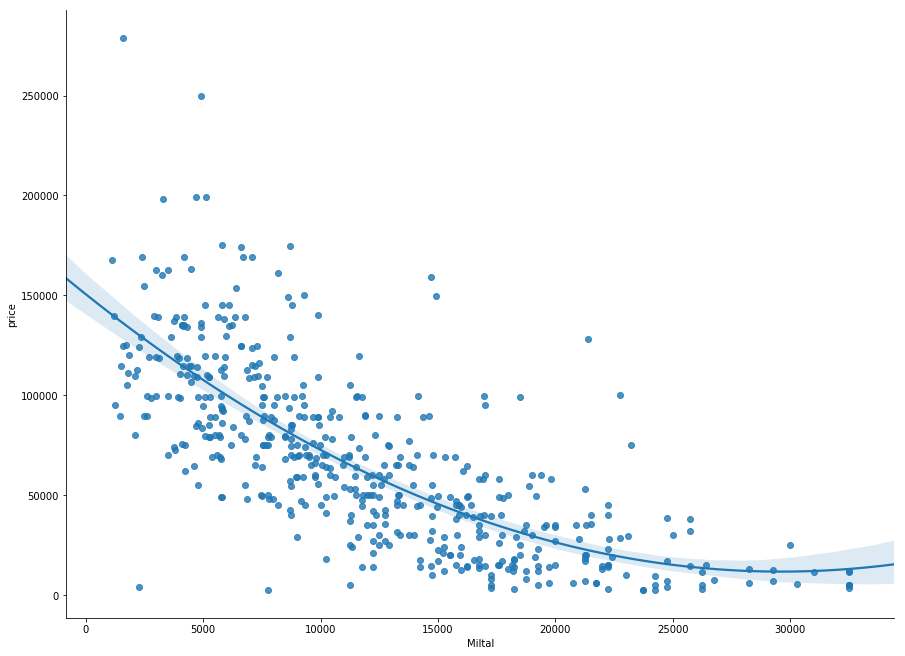

In [6]:
a = sns.lmplot(x="Miltal", y="price", data=df_cars,order=2)
a.fig.set_size_inches(15,10)

In [7]:
linear_regression = LinearRegression()

In [8]:
y = df_cars['price']
feature_colums = ['Miltal','Modellår','Tillverkningsår']
X = df_cars[feature_colums]

/Users/martinalexandersson/Dev/blocket/venv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


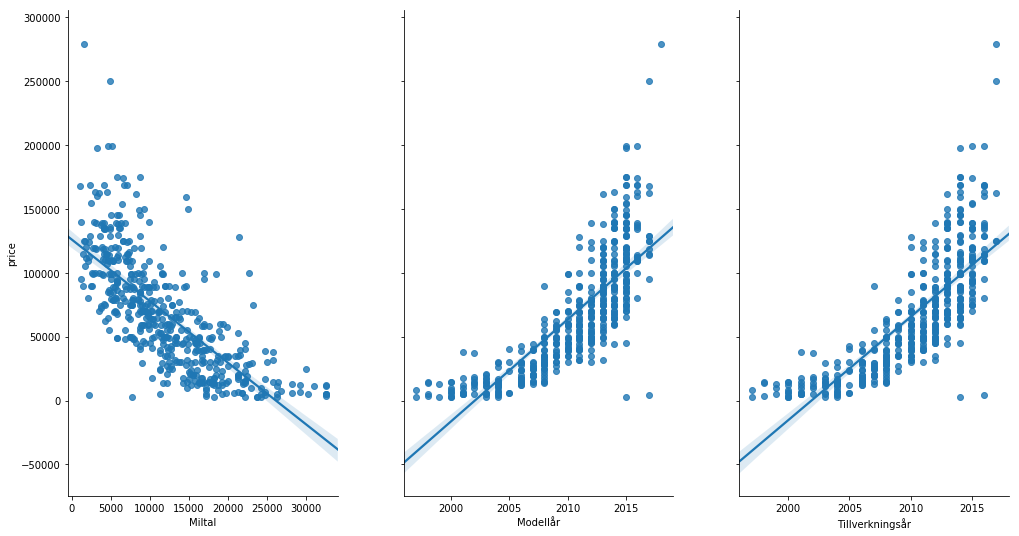

In [9]:
a = sns.pairplot(data = df_cars,x_vars = feature_colums,y_vars=['price'],kind = 'reg',)
a.fig.set_size_inches(15,10)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [11]:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), linear_regression)

r2s = []
for i in range(20):

    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    r2 = r2_score(y_test, y_predict)
    r2s.append(r2)
np.mean(r2s)

/Users/martinalexandersson/Dev/blocket/venv/lib/python3.5/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


0.7704067767558452

In [12]:
model.fit(X, y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [13]:
pickle.dump(model, open('model.pkl', 'wb'))

In [14]:
df_cars['predicted price'] = model.predict(df_cars[feature_colums])
df_cars['price rating'] = df_cars['price'] / df_cars['predicted price']

In [38]:
df_with_href(df_cars.sort_values(by = 'price rating'))

,Bränsle,Miltal,Modellår,Tillverkningsår,Växellåda,car type,header,href,place,price,predicted price,price rating
79511391,Bensin,22249.5,1999,2000,Manuell,berlingo,Citroën Berlingo family -99,href,Västernorrland,3000,-404.976,-7.40784
80433218,Diesel,7749.5,2015,2014,Manuell,caddy,"VW Caddy life 5 sitsig, ev Leasingöverlåtelse -15",href,Uppsala,2581,108995,0.02368
80733755,Diesel,2249.5,2017,2016,Manuell,berlingo,Citroën Berlingo 4X4 dangel -17,href,Östergötland,4125,149080,0.0276698
80426876,Bensin,11249.5,2004,2004,Manuell,berlingo,Citroën Berlingo Family -04,href,Västernorrland,5000,24511.1,0.203989
80613134,Bensin,18249.5,2004,2004,Manuell,berlingo,Citroen berlingo 04 -04,href,Malmö,3000,13967.2,0.214789
80836337,Diesel,32499.5,1998,1998,Manuell,berlingo,"Reservdelsbil Berlingo skåp 1,8 deisel -98",href,Östergötland,3500,13529.8,0.258688
80410345,Diesel,26249.5,1997,1997,Manuell,berlingo,Citroën Berlingo -97,href,Västernorrland,3000,11464.1,0.261686
80887193,Bensin,24249.5,2003,2003,Manuell,berlingo,Citroen berlingo -03,href,Södermanland,2500,8666.72,0.28846
80103428,Bensin,17249.5,2000,2000,Manuell,berlingo,Citroen berlingo family rep. Objekt -00,href,Kalmar,3500,10796.6,0.324176
80911462,Diesel,19249.5,2003,2001,Manuell,berlingo,Berlingo -03,href,Gävleborg,5000,14142.3,0.353549


In [16]:
index = df_cars['header'] == 'Renault Kangoo 1,5 (6 växlad) -08'
df_cars.loc[index]

,Bränsle,Miltal,Modellår,Tillverkningsår,Växellåda,car type,header,href,place,price,predicted price,price rating
80790572,Diesel,15749.5,2008.0,2008.0,Manuell,kangoo,"Renault Kangoo 1,5 (6 växlad) -08",https://www.blocket.se/goteborg/Renault_Kangoo...,Göteborg,45000.0,33287.355842,1.351865


In [17]:
df_cars['car type'].unique()

array(['kangoo', 'berlingo', 'caddy'], dtype=object)

In [18]:
degree = 2
kangoo_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
index = df_cars['car type'] == 'kangoo'
df_kangoo = df_cars.loc[index].copy()

r2s = []
for i in range(20):

    kangoo_model.fit(X_train, y_train)
    y_predict = kangoo_model.predict(X_test)
    r2 = r2_score(y_test, y_predict)
    r2s.append(r2)
np.mean(r2s)


0.7704067767558452

In [19]:
kangoo_model.fit(df_kangoo[feature_colums],df_kangoo['price'])

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [39]:
df_kangoo['predicted price'] = model.predict(df_kangoo[feature_colums])
df_kangoo['price rating'] = df_kangoo['price'] / df_kangoo['predicted price']
df_with_href(df_kangoo.sort_values(by = 'price rating'))

,Bränsle,Miltal,Modellår,Tillverkningsår,Växellåda,car type,header,href,place,price,predicted price,price rating
80900137,Bensin,14723,2006,2006,Manuell,kangoo,Renault Kangoo 1.6 95hk -06,href,Älvsborg,14800,25012.5,0.591704
80818741,Bensin,17551,2006,2006,Manuell,kangoo,Renault Kangoo 1.6 M-VÄRM 5-SITS DRAG -06,href,Stockholm,14900,21378,0.69698
80783111,Bensin,17249.5,2000,2000,Manuell,kangoo,"RENAULT Kangoo 1,4 SNABB AFFÄR 8000 KR -00",href,Östergötland,8000,10796.6,0.740973
77656999,Diesel,12000,2009,2009,Manuell,kangoo,Renault Kangoo 1.5 DCI Skåp / Nybesiktigad -09,href,Södermanland,34900,45368.9,0.76925
80934421,Diesel,32499.5,2003,2002,Manuell,kangoo,Renault kangoo -03,href,Halland,11500,14362.6,0.800691
80696920,El,1441,2013,2013,Automat,kangoo,Renault Kangoo Express Maxi II Z.E. Aut -13,href,Kristianstad,89900,105461,0.852446
79745147,Diesel,8998,2013,2012,Manuell,kangoo,Renault Kangoo II 1.5 dCi FAP (110hk) Style 5 -13,href,Uppsala,74900,85951.8,0.871419
80603429,Bensin,6800,2009,2008,Manuell,kangoo,Renault Kangoo 1.6|5-Sits|6800Mil|Fullservad -09,href,Göteborg,54900,61624.5,0.890879
80281611,Bensin,19249.5,2001,2000,Manuell,kangoo,Renault Kangoo -01,href,Kronoberg,11900,12985.9,0.916378
80865099,Bensin,16249.5,1998,1998,Manuell,kangoo,Renault kangoo . ny motor -98,href,Piteå,14000,14498.1,0.965642


In [21]:
index = df_kangoo['header'] == 'Renault Kangoo 1,5 (6 växlad) -08'
df_kangoo.loc[index]

,Bränsle,Miltal,Modellår,Tillverkningsår,Växellåda,car type,header,href,place,price,predicted price,price rating
80790572,Diesel,15749.5,2008.0,2008.0,Manuell,kangoo,"Renault Kangoo 1,5 (6 växlad) -08",https://www.blocket.se/goteborg/Renault_Kangoo...,Göteborg,45000.0,33287.355842,1.351865


In [22]:
index = df_kangoo['header'] == 'Renault Kangoo 1.6|5-Sits|6800Mil|Fullservad -09'
df_kangoo.loc[index]



,Bränsle,Miltal,Modellår,Tillverkningsår,Växellåda,car type,header,href,place,price,predicted price,price rating
80603429,Bensin,6800.0,2009.0,2008.0,Manuell,kangoo,Renault Kangoo 1.6|5-Sits|6800Mil|Fullservad -09,https://www.blocket.se/goteborg/Renault_Kangoo...,Göteborg,54900.0,61624.539734,0.890879
